In [48]:
import cv2
import os
import glob
import sys
import imageio
from scipy import misc
import numpy as np

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
img_dir = os.path.abspath('/images/')

### Image path

In [202]:
data_dir  = "train/Sun Training Data/Train_0001"
rgb_dir = data_dir + "/CameraRGB"
seg_dir = data_dir + "/CameraSeg"
depth_dir = data_dir + "/Cameradepth"

rgb_path = os.path.join(rgb_dir, "*.png")
seg_path = os.path.join(seg_dir, "*.png")
depth_path = os.path.join(depth_dir, "*.png")

In [45]:
# Saved path
output_dir  = "data/train_01"
rgb_output_dir = output_dir + "/CameraRGB"
seg_output_dir = output_dir + "/CameraSeg"
depth_output_dir = output_dir + "/CameraDepth"

### Depth Image Formatting

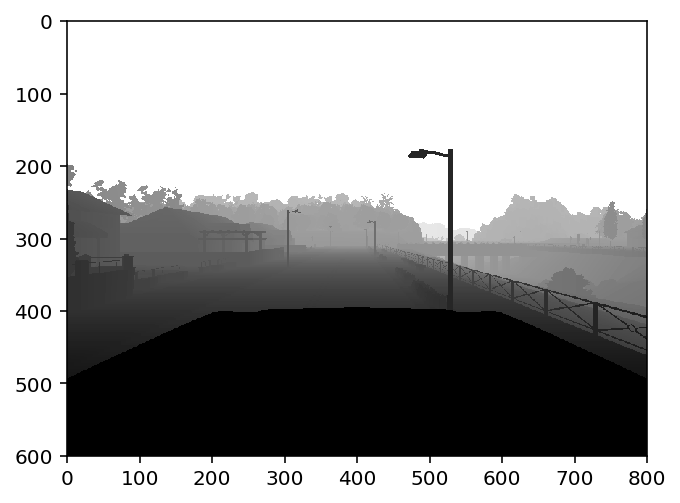

In [120]:
# Read depth image
depth_rgb = imageio.imread(file)

# Normilize 24 bit into [0.0, 1.0] grayscale image
normalized_depth = np.dot(depth_rgb[:, :, :3], [1.0, 256.0, 65536.0])
normalized_depth /= 16777215.0  # (256.0 * 256.0 * 256.0 - 1.0)

# encoded depth-map to a logarithmic grayscale image
logdepth = np.ones(normalized_depth.shape) + (np.log(normalized_depth) / 5.70378)
logdepth = np.clip(logdepth, 0.0, 1.0)
logdepth *= 255.0
logdepth = logdepth.astype(np.uint8)

plt.imshow(logdepth, cmap='gray')

In [122]:
total_num = 0
for i, file in enumerate(glob.glob(depth_path)):
    file_name = os.path.basename(file)
    depth_rgb = imageio.imread(file)
    normalized_depth = np.dot(depth_rgb[:, :, :3], [1.0, 256.0, 65536.0])
    normalized_depth /= 16777215.0  # (256.0 * 256.0 * 256.0 - 1.0)

    logdepth = np.ones(normalized_depth.shape) + (np.log(normalized_depth) / 5.70378)
    logdepth = np.clip(logdepth, 0.0, 1.0)
    logdepth *= 255.0
    logdepth = logdepth.astype(np.uint8)
    
    imageio.imwrite(depth_output_dir + '/' + file_name, logdepth, format='png')
    total_num += 1
    
print(total_num)   

109


### Semantic Segmentation Formatting

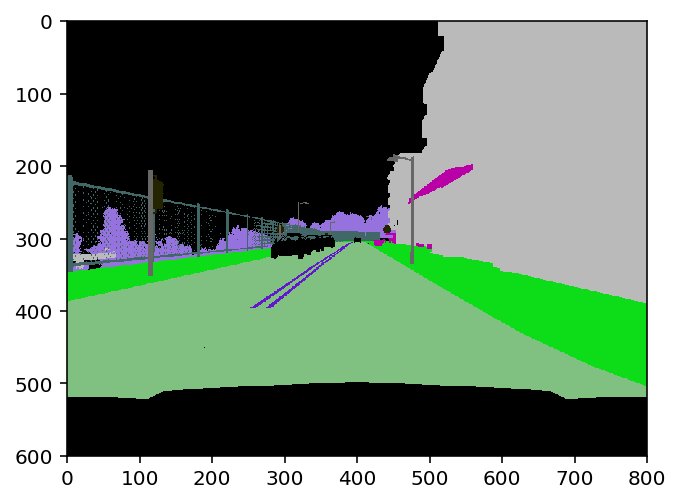

In [203]:
classes = {
    0: [0, 0, 0],         # None
    1: [70, 70, 70],      # Buildings
    2: [190, 153, 153],   # Fences
    3: [72, 0, 90],       # Other
    4: [220, 20, 60],     # Pedestrians
    5: [153, 153, 153],   # Poles
    6: [157, 234, 50],    # RoadLines
    7: [128, 64, 128],    # Roads
    8: [244, 35, 232],    # Sidewalks
    9: [107, 142, 35],    # Vegetation
    10: [0, 0, 255],      # Vehicles
    11: [102, 102, 156],  # Walls
    12: [220, 220, 0]     # TrafficSigns
}

depth_seg = imageio.imread(file)
result = np.zeros((depth_seg.shape[0], depth_seg.shape[1], 3))

for key, value in classes.items():
    result[np.where(depth_seg[:,:,0] == key)] = value
    
plt.imshow(result)

In [206]:
total_num = 0

for i, file in enumerate(glob.glob(seg_path)):
    file_name = os.path.basename(file)
    depth_seg = imageio.imread(file)
    result = np.zeros((depth_seg.shape[0], depth_seg.shape[1], 3))

    for key, value in classes.items():
        result[np.where(depth_seg[:,:,0] == key)] = value
    
    result = result.astype(np.uint8)
    imageio.imwrite(seg_output_dir + '/' + file_name, result, format='png')
    total_num += 1

print(total_num) 

1000
